# <p style="background-color:#E6E6FA;font-family:newtimeroman;color:#141414;font-size:150%;text-align:center;border-radius:10px 10px;">CHURN PREDICTION FOR BANK CUSTOMERS</p>


# <p style="background-color:	#D1D1D1;font-family:newtimeroman;color:#141414;font-size:120%;text-align:center;border-radius:10px 5px;"> Table of contents</p>


<a id="toc"></a>

* [   About Dataset](#0)
     

* [1) LIBRARIES NEEDED IN THE STUDY](#1)

* [2) DATA](#2)
           2.1 Read the dataset
           2.2 get the data type for every column
           2.3 number of missing values
           2.4 get some statistical calculation for the dataset
       
       
* [3) EXPLORATORY DATA ANALYSIS](#3)
           3.1 what is percentage of retained country customer?
           3.2 check the state of exiters whiether they has credit card and active member or not for each country?
           3.3 check the state of exiters with num of products for each country?
           3.4 what is the costumer ages that only has closed account with bank ?
           3.5 what is The column which has the maximum correlation with the Exited case?
           3.6 What is the detailed correlation between exited case & other featuers?
           

* [4) DATA VISULIZATION](#4)
           4.1 pairplot
           4.2 heatmap
           4.3 relation between Tenure of the customer, his Balance and his Exited case
           4.4 relation between Geography, EstimatedSalary and Exited case


* [5) DATA PREPROCESSING](#4)
           5.1 Drop unneeded columns
           5.2 convert string columns into integer
           

* [6) ML Algorithms](#4)
           6.1 logistic regression
           6.2 support vector machine
           6.3 KNN
           6.4 Decision Tree




#  **About Dataset**

**This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.**

**Each row represents a bank customer, each column contains customer’s attributes described on the column Metadata.**

**The data set includes information about:**
* Customers who left bank – the column is called "Exited"
* Customer account information that each customer has 'creditscore', 'balance', 'numofproducts', 'hascrcard', 'isactivemember'.
* Demographic info about customers – surname, geography, gender, age range, tenure and 'estimatedsalary'.

> # **Detailed information for each column:**
 
Row Number: Row Numbers from 1 to 10000

Customer Id: Unique Ids for bank customer identification

Surname: Customer's last name

Credit Score: Credit score of the customer

Geography: The country from which the customer belongs

Gender: Male or Female

Age: Age of the customer

Tenure: Number of years for which the customer has been with the bank

Balance: Bank balance of the customer

NumOfProducts: Number of bank products the customer is utilizing

Has Cr Card: Binary Flag for whether the customer holds a credit card with the bank or not

Is Active Member: Binary Flag for whether the customer is an active member with the bank or not

Estimated Salary: Estimated salary of the customer in Dollars

Exited: Binary flag 1 if the customer closed account with bank and 0 if the customer is retained


<p style = "font-size : 25px; color : #141414 ; font-family : 'Comic Sans MS';  "><strong>Import libraries</strong></p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import scipy.stats as st
import math
from scipy.stats import norm, skew
from collections import Counter
import matplotlib.gridspec as gridspec
%matplotlib inline

> # <p style = "font-size : 25px; color : #141414 ; font-family : 'Comic Sans MS';  "><strong>DATA</strong></p>

In [2]:
df = pd.read_csv("../input/churn-modelling/Churn_Modelling.csv")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

<p style = "font-size : 25px; color : #141414 ; font-family : 'Comic Sans MS';  "><strong>Get the data type for every column</strong></p>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<p style = "font-size : 25px; color : #141414 ; font-family : 'Comic Sans MS';  "><strong> Number of missing values </strong></p>

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<p style = "font-size : 25px; color :#141414 ; font-family : 'Comic Sans MS';  "><strong> Get some statistical calculation for the dataset</strong></p>

In [5]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

# <p style="background-color:	#D1D1D1;font-family:newtimeroman;color:#141414;font-size:120%;text-align:center;border-radius:10px 5px;"> DATA ANALYSIS</p>

<p style = "font-size : 25px; color : #141414 ; font-family : 'Comic Sans MS';  "><strong> 1-what is percentage of retained country customer? </strong></p>

In [6]:
total_number_of_customer_country=df['Geography'].value_counts()
total_number_of_retained_country_customers= df[(df['Exited']==0)]['Geography'].value_counts()
per_of_retained_country_custumers = (total_number_of_retained_country_customers / total_number_of_customer_country )*100
pd.concat([total_number_of_customer_country, total_number_of_retained_country_customers,per_of_retained_country_custumers], axis=1, keys=['total number of custumer country', 'total number of retained country custumers','percentage of retained country custumers'])

total number of custumer country  \
France                               5014   
Germany                              2509   
Spain                                2477   

         total number of retained country custumers  \
France                                         4204   
Germany                                        1695   
Spain                                          2064   

         percentage of retained country custumers  
France                                  83.845233  
Germany                                 67.556796  
Spain                                   83.326605

***OBSERVASION:***
**germany has the lowest percentage of retainers , that equals 67.5%
while spain and france are almost the same percetage which is 83%**

<p style = "font-size : 25px; color : #141414 ; font-family : 'Comic Sans MS';  "><strong>2- check the state of exiters whiether they has credit card and active member or not for each country? </strong></p>

In [7]:
exiters_even_HasCrCard_and_ActiveMember= df[(df['HasCrCard']==1) & (df['IsActiveMember']==1) & (df['Exited']==1)]['Geography'].value_counts()
total_exiters= df[df['Exited']==1]['Geography'].value_counts()
d= exiters_even_HasCrCard_and_ActiveMember / total_exiters *100
pd.concat([exiters_even_HasCrCard_and_ActiveMember,total_exiters,d],axis=1, keys=['exiters even HasCrCard and ActiveMember','total exiters','ratio'])

exiters even HasCrCard and ActiveMember  total exiters      ratio
Germany                                      199            814  24.447174
France                                       195            810  24.074074
Spain                                         88            413  21.307506

***OBSERVASION:***
**even germany had the highest percentage of exiters but its mostly has the same as france in ratio between state of exiters whiether they has credit card and active member and not
so spanish people is the most customers retained at the bank**

<p style = "font-size : 25px; color : #141414 ; font-family : 'Comic Sans MS';  "><strong>3- check the state of exiters with num of products for each country? </strong></p>

In [8]:
Num_OF_EXITERS_f = df[(df['Exited']== 1) & (df['Geography']=='France')]['NumOfProducts'].value_counts()
Num_OF_EXITERS_g = df[(df['Exited']== 1) & (df['Geography']=='Germany')]['NumOfProducts'].value_counts()
Num_OF_EXITERS_s = df[(df['Exited']== 1) & (df['Geography']=='Spain')]['NumOfProducts'].value_counts()
total_f = df[(df['Geography']=='France')]['NumOfProducts'].value_counts()
total_g = df[(df['Geography']=='Germany')]['NumOfProducts'].value_counts()
total_s = df[(df['Geography']=='Spain')]['NumOfProducts'].value_counts()
p_f= Num_OF_EXITERS_f / total_f * 100
p_g= Num_OF_EXITERS_g / total_g * 100
p_s= Num_OF_EXITERS_s / total_s * 100

<p style = "font-size : 20px; font-family : 'Comic Sans MS';  "><strong>- France</strong></p>

In [9]:
pd.concat([Num_OF_EXITERS_f, total_f,p_f], axis=1, keys=['Num of exiters', 'total number of country custumers','percentage of exiters'])

Num of exiters  total number of country custumers  percentage of exiters
1             564                               2514              22.434368
2             135                               2367               5.703422
3              82                                104              78.846154
4              29                                 29             100.000000

<p style = "font-size : 20px; font-family : 'Comic Sans MS';  "><strong> - Germany </strong></p>

In [10]:
pd.concat([Num_OF_EXITERS_g, total_g,p_g], axis=1, keys=['Num of exiters', 'total number of country custumers','percentage of exiters'])

Num of exiters  total number of country custumers  percentage of exiters
1             578                               1349              42.846553
2             126                               1040              12.115385
3              86                                 96              89.583333
4              24                                 24             100.000000

<p style = "font-size : 20px; font-family : 'Comic Sans MS';  "><strong> - Spain </strong></p>

In [11]:
pd.concat([Num_OF_EXITERS_s, total_s,p_s], axis=1, keys=['Num of exiters', 'total number of country custumers','percentage of exiters'])

Num of exiters  total number of country custumers  percentage of exiters
1             267                               1221              21.867322
2              87                               1183               7.354184
3              52                                 66              78.787879
4               7                                  7             100.000000

***OSERVASION:*
as we see , we notice that all customer's country exited at num of products = 4.
and germany has the highest percentage of exiters for all numbers of products as we mention before.**

<p style = "font-size : 25px; color :#141414 ; font-family : 'Comic Sans MS';  "><strong>4- what is the costumer ages that only has closed account with bank ? </strong></p>

In [12]:
def age_count(x):
    if x in (df[df['Exited']== 0]['Age']):
        pass
    else:
        return x
    
df[df['Exited']== 1]['Age'].apply(lambda x: age_count(x)).value_counts()

46.0    91
43.0    88
47.0    77
41.0    69
35.0    57
54.0    51
53.0    40
58.0    29
30.0    24
22.0    12
70.0     4
Name: Age, dtype: int64

<p style = "font-size : 25px; color : #141414 ; font-family : 'Comic Sans MS';  "><strong> 5-what is The column which has the maximum correlation with the Exited case? </strong></p>

In [13]:
max = 0
x=0
for i in df.select_dtypes(include=np.number).drop(['Exited'],axis=1).columns:
    if (df[i].corr(df['Exited'])) > max:
        max = df[i].corr(df['Exited'])
        x = i
print("The column which has the maximum correlation with the Exited case is: {0}" .
      format(x))

The column which has the maximum correlation with the Exited case is: Age


**the age of customer is the most feature that affect on its exited case**

<p style = "font-size : 25px; color : #141414 ; font-family : 'Comic Sans MS';  "><strong>6- What is the detailed correlation between exited case & other featuers? </strong></p>

In [14]:
corr = df.corr()
corr.sort_values(by=['Exited'],ascending=False).iloc[0].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
CustomerId        -0.006248
HasCrCard         -0.007138
Tenure            -0.014001
RowNumber         -0.016571
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

# <p style="background-color:	#D1D1D1;font-family:newtimeroman;color:#141414;font-size:120%;text-align:center;border-radius:10px 5px;"> DATA VISULIZATION</p>


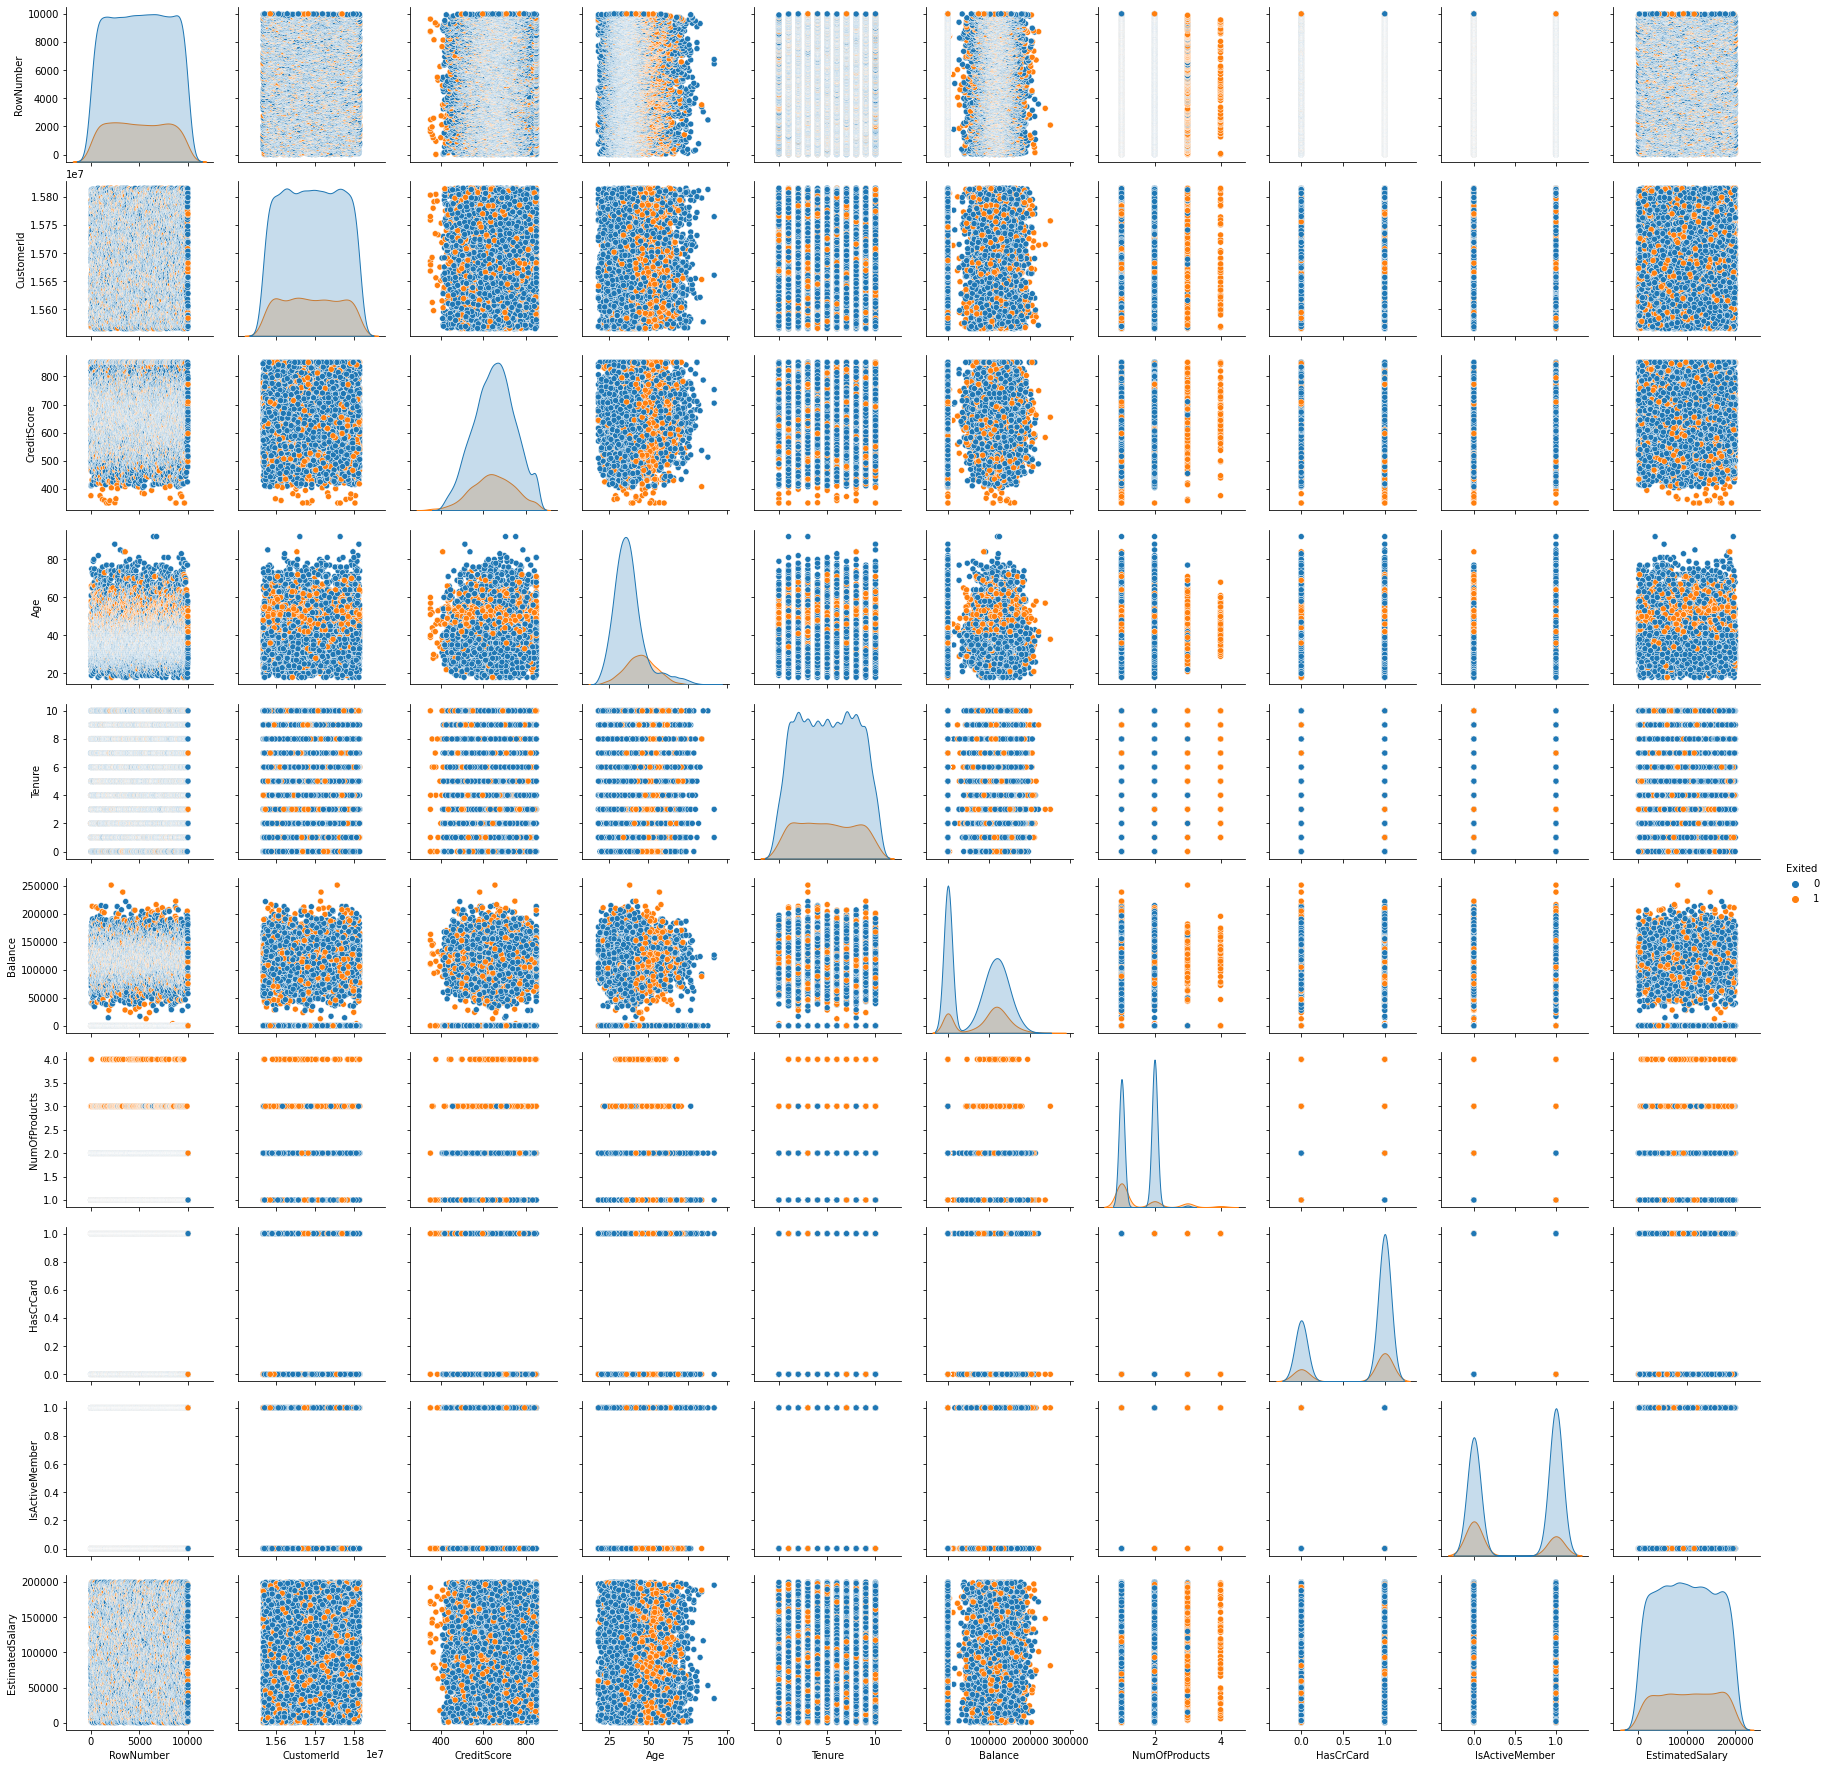

In [15]:
sns.pairplot(df,hue='Exited')

<AxesSubplot:>

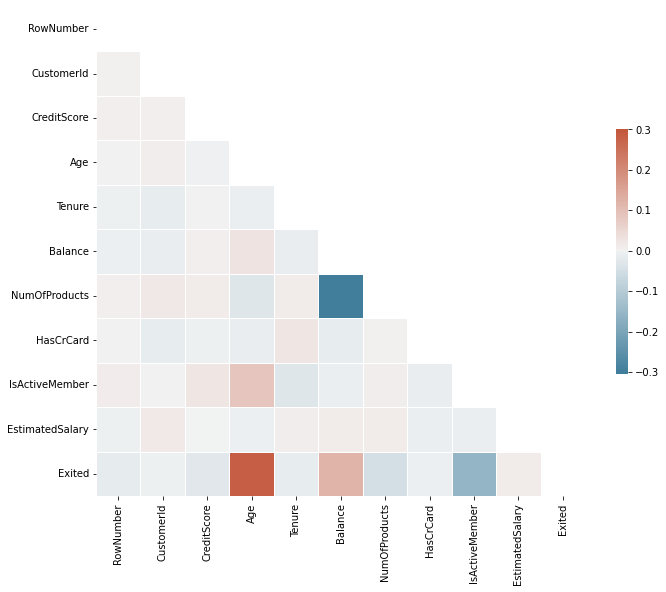

In [16]:
# compute the correlation matrix

corr = df.corr()

# generate a mask for the upper triangle

mask = np.triu(np.ones_like(corr,dtype=bool))

# set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

#generate a custom diverging colormap
cmap = sns.diverging_palette(230,20,as_cmap=True)

#draw the heatpmap ith the mask and correct aspect ratio
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.3,center=0,square=True,linewidths=.5,cbar_kws = {'shrink':.5})

/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


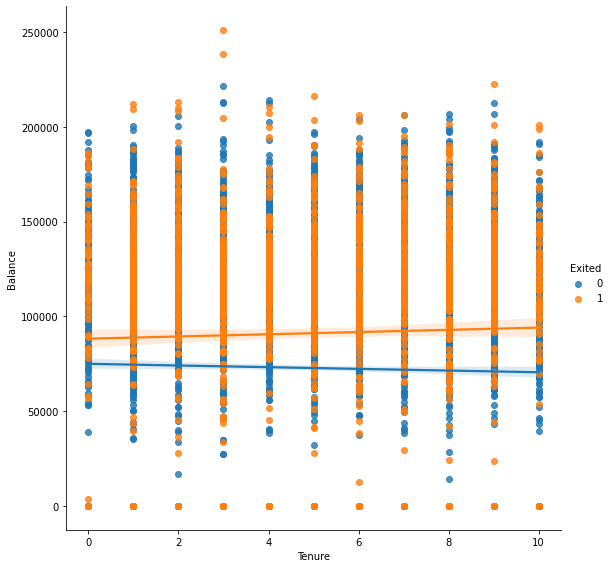

In [17]:
sns.lmplot(x='Tenure', y='Balance', data=df ,hue='Exited',size=8)

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64


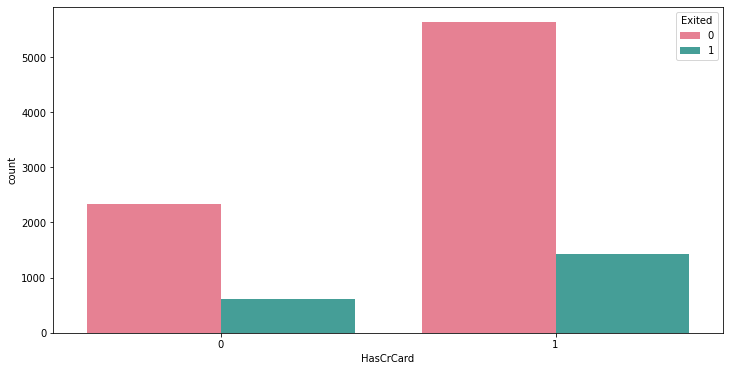

In [18]:
plt.figure(figsize = (12,6)) 
sns.countplot(x="HasCrCard",hue = "Exited", data=df, palette="husl");
print(df.groupby('Geography')["Exited"].sum())

In [19]:
fig = px.box(df, x="Geography", y = "EstimatedSalary",color = 'Exited'); # Another visualization about salary effect
fig.update_layout(title_text="The country with the mean salary-With Outliers(Exited-Not Exited groups)")
fig.show();

# <p style="background-color:	#D1D1D1;font-family:newtimeroman;color:#141414;font-size:120%;text-align:center;border-radius:10px 5px;"> Data preprocessing</p>


#  ***Drop unneeded columns***

In [20]:
df.drop(['CustomerId','Surname','RowNumber'],inplace=True,axis=1)

# ***Convert string columns into integer***

In [21]:
df['Geography'] = df['Geography'].map({'France':0,'Spain':1,'Germany':2})
df['Gender'] = df['Gender'].map({'Female':0,'Male':1})

In [22]:
df.head(5)

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          1       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          1       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

# <p style="background-color:	#D1D1D1;font-family:newtimeroman;color:#141414;font-size:120%;text-align:center;border-radius:10px 5px;">  ML algorithms</p>


<p style = "font-size : 25px; color : #141414 ; font-family : 'Comic Sans MS';  "><strong> import libraries needed for ml algorithms </strong></p>

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

<p style = "font-size : 25px; color : #141414 ; font-family : 'Comic Sans MS';  "><strong> Split the dataset into training & testing sets </strong></p>

In [24]:
y=df['Exited']
x=df.drop('Exited',axis=1)
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3, random_state=101)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
print('DataFrame Shape:', df.shape)
print('*'*25)
print('X Train Shape:', X_train.shape)
print('*'*25)
print('X Test Shape:', X_test.shape)
print('*'*25)
print('Y Train Shape:', Y_train.shape)
print('*'*25)
print('Y Test Shape:', Y_test.shape)

DataFrame Shape: (10000, 11)
*************************
X Train Shape: (7000, 10)
*************************
X Test Shape: (3000, 10)
*************************
Y Train Shape: (7000,)
*************************
Y Test Shape: (3000,)


<p style = "font-size : 25px; color : #141414 ; font-family : 'Comic Sans MS';  "><strong> logistic regression </strong></p>

In [26]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
predictions = logmodel.predict(X_test)
print(confusion_matrix(Y_test,predictions))
print(classification_report(Y_test,predictions))

[[2301   77]
 [ 496  126]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2378
           1       0.62      0.20      0.31       622

    accuracy                           0.81      3000
   macro avg       0.72      0.59      0.60      3000
weighted avg       0.78      0.81      0.77      3000



In [27]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test,predictions)

0.5850960979395802

<p style = "font-size : 25px; color : #141414 ; font-family : 'Comic Sans MS';  "><strong> support vector machine </strong></p>

In [28]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[2332   46]
 [ 376  246]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2378
           1       0.84      0.40      0.54       622

    accuracy                           0.86      3000
   macro avg       0.85      0.69      0.73      3000
weighted avg       0.86      0.86      0.84      3000



In [29]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test,y_pred)

0.6880772028698222

<p style = "font-size : 25px; color : #141414 ; font-family : 'Comic Sans MS';  "><strong> KNN </strong></p>

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, pred)
print(cm)
print(classification_report(Y_test,pred))

[[2081  297]
 [ 328  294]]
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      2378
           1       0.50      0.47      0.48       622

    accuracy                           0.79      3000
   macro avg       0.68      0.67      0.68      3000
weighted avg       0.79      0.79      0.79      3000



In [31]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test, pred)

0.6738869703255188

<p style = "font-size : 25px; color : #141414 ; font-family : 'Comic Sans MS';  "><strong> Decision Tree </strong></p>

In [32]:
from sklearn import tree
from sklearn.model_selection import train_test_split
clf=tree.DecisionTreeClassifier(criterion='gini',min_samples_split=30,splitter="best")
clf=clf.fit(X_train,Y_train)
Y_pred=clf.predict(X_test)
accuracy=accuracy_score(Y_test,y_pred)
average_precision = average_precision_score(Y_test,y_pred)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[2189  189]
 [ 283  339]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      2378
           1       0.64      0.55      0.59       622

    accuracy                           0.84      3000
   macro avg       0.76      0.73      0.75      3000
weighted avg       0.84      0.84      0.84      3000



In [33]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test,Y_pred)

0.7327687618820972

> <p style = "font-size : 25px; color : #141414 ; font-family : 'Comic Sans MS';  "><strong> As we see, with different algorithms the accuracy still small.
SO, I'll try now to re preprocessing my dataset to increase the final accuracy. </strong></p>

**First, We will create new age groups for improve our perdiction score.**

In [34]:
age_group_data = [None] * len(df['Age'])
for i in range(len(df['Age'])):
    if df['Age'][i] < 30:
        age_group_data[i] = 'Young'
    elif df['Age'][i] >=30 and df['Age'][i] < 40:
        age_group_data[i] = 'Young-Adults'
    elif df['Age'][i] >=40 and df['Age'][i] < 50:
        age_group_data[i] = 'Adults'
    elif df['Age'][i] >=50 and df['Age'][i] < 60:
        age_group_data[i] = 'Elderly-Adults'
    elif df['Age'][i] >=60 and df['Age'][i] < 74:
        age_group_data[i] = 'Old'
    else:
        age_group_data[i] = 'Very-Old'

df['age_group'] = age_group_data

**We will create new 5 credit score groups. Because the credit score has no effect on exit rates so we'll enough with only 5 groups.**

In [35]:
Credit = [None] * len(df['CreditScore'])
for i in range(len(df['CreditScore'])):
    if (df['CreditScore'][i] <= 450.0) &(df['CreditScore'][i] >=349.5):
        Credit[i] = 0
    elif (df['CreditScore'][i] <= 550.0) &(df['CreditScore'][i] > 450.0):
        Credit[i] = 1
    elif (df['CreditScore'][i] <= 650.0) &(df['CreditScore'][i] >550.0):
        Credit[i] = 2
    elif (df['CreditScore'][i] <= 750.0)&(df['CreditScore'][i] >650.0):
        Credit[i] = 3
    elif (df['CreditScore'][i] <= 850.0)&(df['CreditScore'][i] >750.0):
        Credit[i] = 4
        
df['new_credit'] = Credit

***let's Check the missing values again***

In [36]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
age_group          0
new_credit         0
dtype: int64

***Now we will convert the age group we have just made into integer values.***

In [37]:
df['age_group'] = df['age_group'].map({'Young': 0,'Young-Adults':1,'Adults':2,'Elderly-Adults':3,'Old':4,'Very-Old':5})

In [38]:
df.drop(['Age','CreditScore'],inplace=True,axis=1)

In [39]:
df.head()

Geography  Gender  Tenure    Balance  NumOfProducts  HasCrCard  \
0          0       0       2       0.00              1          1   
1          1       0       1   83807.86              1          0   
2          0       0       8  159660.80              3          1   
3          0       0       1       0.00              2          0   
4          1       0       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  age_group  new_credit  
0               1        101348.88       1          2           2  
1               1        112542.58       0          2           2  
2               0        113931.57       1          2           1  
3               0         93826.63       0          1           3  
4               1         79084.10       0          2           4

<p style = "font-size : 25px; color : #800000 ; font-family : 'Comic Sans MS';  "><strong> Random forests </strong></p>

In [40]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, Y_train)
rfc_pred = rfc.predict(X_test)

In [41]:
cm = confusion_matrix(Y_test, rfc_pred)
print(cm)
print(classification_report(Y_test,rfc_pred))

[[2284   94]
 [ 321  301]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2378
           1       0.76      0.48      0.59       622

    accuracy                           0.86      3000
   macro avg       0.82      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000



In [42]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test, rfc_pred)

0.7221969068010893